## Introducción

* La extracción de características consiste en tomar los datos o señal de entrada y transformarlos en otros datos de menor dimensión, preservando información relevante de la señal original

$$\hat{X}_{m,1} = f(X_{n,1})$$

donde $ m < n $.
* Esto permite que los modelos de aprendizaje de máquina sean más eficientes, debido a que necesitan menor capacidad de cómputo para manejar o manipular los datos.

* En este laboratorio trabajaremos con características estadísticas de los datos (media, varianza y curtosis), potencia, y características espectrales o del dominio de la frecuencia, estas últimas utilizando autocorrelación y la transformada de tiempo corto de Fourier.

* Además, utilizaremos diferentes herramientas gráficas para interpretar las características extraídas de los datos, tales como mapas de calor,  distribución de características en planos de dos dimensiones, y  gráficas de series de tiempo multivariadas.


## Adquisición y visualización de datos  (señales)


# Laboratorio: Extracción de Características


**Autor:**

* Pablo Alejandro Alvarado Duran, PhD.
*   Cristian David Ríos Urrego, MSc.
*   Diana Patricia Tobon Vallejo, PhD.

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1GfuIowDfDgFvDe5CGdytjdzMUcinZ0-r' -O 'dataset.zip'
!unzip dataset.zip

--2024-09-26 15:22:18--  https://drive.google.com/uc?export=download&id=1GfuIowDfDgFvDe5CGdytjdzMUcinZ0-r
Resolving drive.google.com (drive.google.com)... 2800:3f0:4005:403::200e, 142.251.132.110
Connecting to drive.google.com (drive.google.com)|2800:3f0:4005:403::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GfuIowDfDgFvDe5CGdytjdzMUcinZ0-r&export=download [following]
--2024-09-26 15:22:18--  https://drive.usercontent.google.com/download?id=1GfuIowDfDgFvDe5CGdytjdzMUcinZ0-r&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2800:3f0:4005:403::2001, 142.250.78.129
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2800:3f0:4005:403::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815624 (797K) [application/octet-stream]
Saving to: 'dataset.zip'

dataset.zip         100%[===================>] 796.51K  1.81

In [4]:
import soundfile as sf
import librosa as lr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp

In [5]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

data = []
print("importanto archivo:")
for i in range(8):
    fname = "dataset/note" + str(i+1) + ".mp3"
    print(fname)
    sound, samplerate = lr.load(fname)
    n = sound.size
    data.append(sound)

print(f"frecuencia de muestreo: {samplerate} Hz")
print(f"número de muestras por señal: {n}")

importanto archivo:
dataset/note1.mp3
dataset/note2.mp3
dataset/note3.mp3
dataset/note4.mp3
dataset/note5.mp3
dataset/note6.mp3
dataset/note7.mp3
dataset/note8.mp3
frecuencia de muestreo: 22050 Hz
número de muestras por señal: 107136


In [6]:
time = np.arange(0, n/samplerate, 1/samplerate)

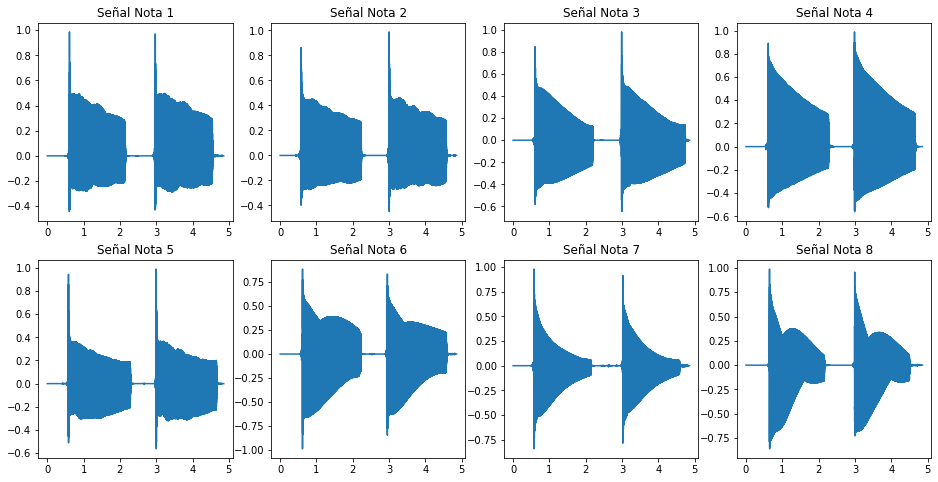

In [7]:
plt.figure(figsize=(16, 8)) # graficar datos importados
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.plot(time, data[i])
    plt.title("Señal Nota " + str(i+1))


In [6]:
import IPython
IPython.display.Audio("dataset/note" + str(6) + ".mp3")

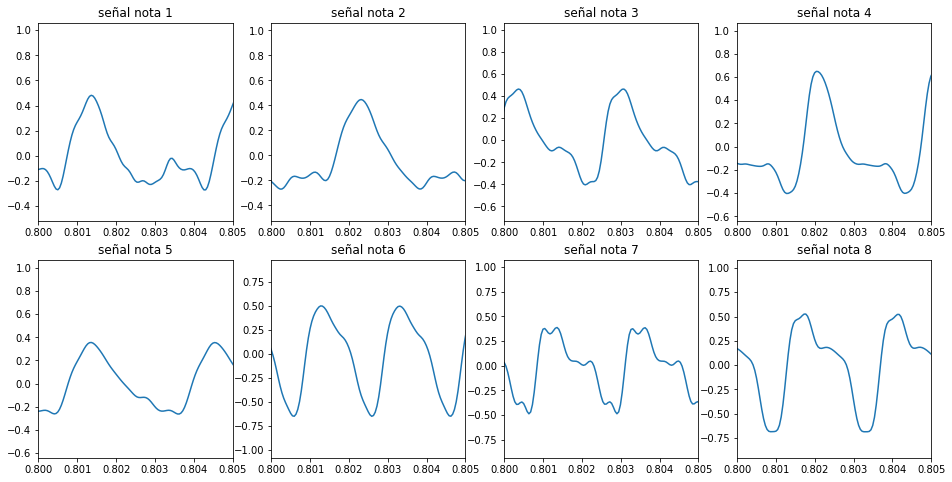

In [8]:
plt.figure(figsize=(16, 8)) # zoom in data
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.plot(time, data[i])
    plt.title("señal nota " + str(i+1))
    plt.xlim(0.8, 0.805)


### Ejercicio 1
Grafique la densidad espectral (transformada de Fourier de potencia de cada una de las señales cargadas anteriormente)

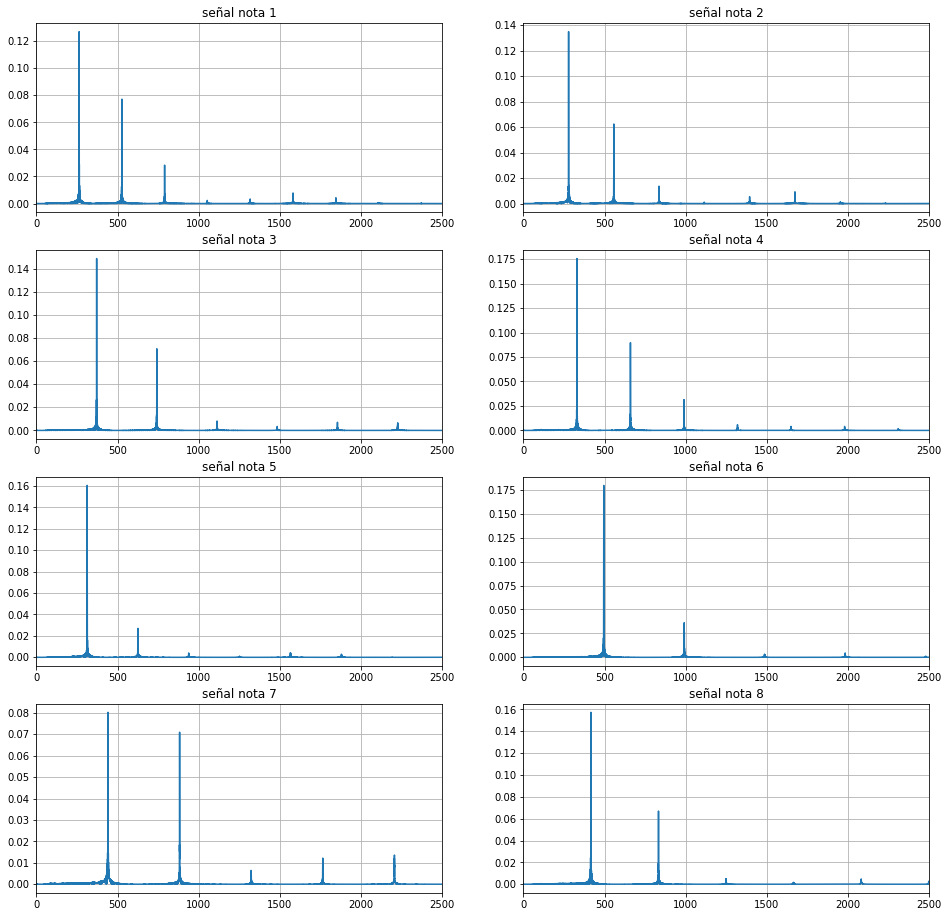

In [9]:
from scipy.fft import fft, fftfreq

T = 1./samplerate

plt.figure(figsize=(16, 16))

for i in range(8):
    plt.subplot(4,2,i+1)
    yf = fft(data[i])
    N = len(data[i])
    xf = fftfreq(N, T)[0:N//2]
    yf_abs = 2.0/N * np.abs(yf[0:N//2])
    plt.plot(xf, yf_abs)

    plt.grid()
    plt.xlim([0, 2500])
    plt.title("señal nota " + str(i+1))


## Extracción de características estadísticas

In [10]:
nwin = 512 # num muestras en 25 milisegundos (aproximadamente)
punto_inicial = 22050 # punto inicial 1 segundo

segmentos = []
labels = [] # lista de caracteristicas
mean = []
var = []
kur = []

for i in range(8):
    for j in range(20): #Se obtienen 20 ventanas por audio
        aux1 = data[i][punto_inicial + j*nwin : punto_inicial + (j + 1)*nwin]
        segmentos.append(aux1)
        labels.append(i+1)
        mean.append(aux1.mean())
        var.append(aux1.var())
        kur.append(sp.stats.kurtosis(aux1))

In [11]:
mean = np.array(mean).reshape(-1,1)
var = np.array(var).reshape(-1,1)
kur = np.array(kur).reshape(-1,1)
labels = np.array(labels).reshape(-1,1)

car = np.hstack((mean, var, kur, labels))
dataframe = pd.DataFrame(car, columns = ['media','varianza', 'kurtosis', 'labels'])

## Visualización de características utilizando pairplots

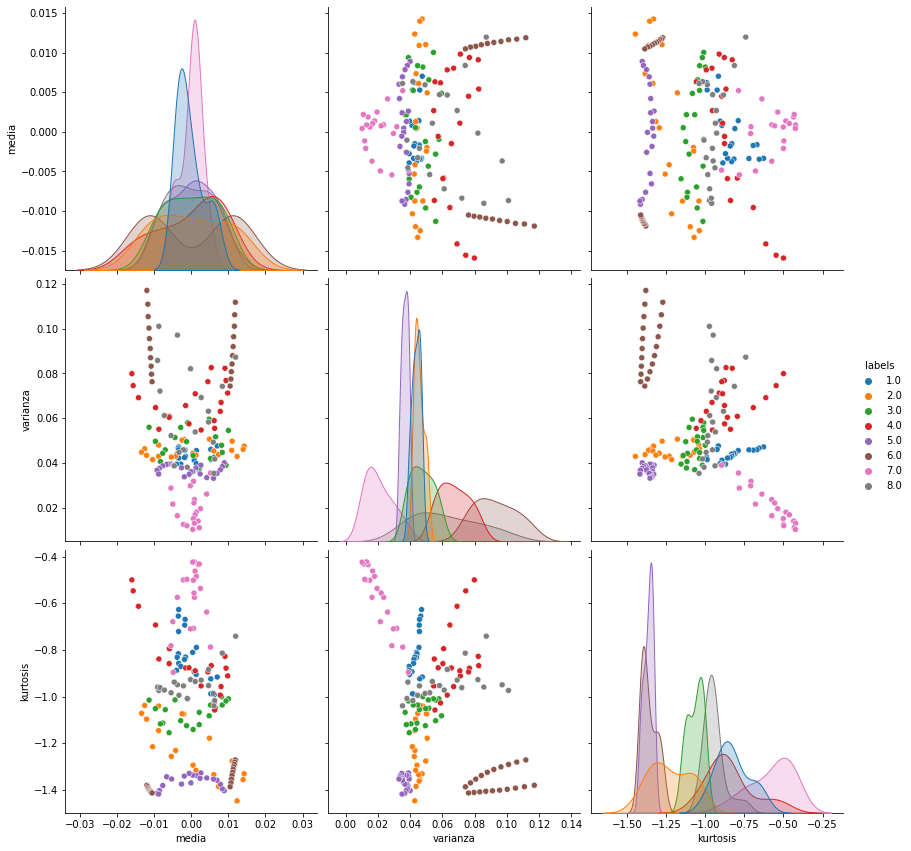

In [12]:
sns.pairplot(dataframe, hue='labels',palette='tab10', height=4);

## Extracción de características usando Coeficientes Cepstrales en la Escala de Mel (MFCCs)

Los Coeficientes Cepstrales en la Escala de Mel (MFCCs) son una representación de una señal de audio, diseñada para capturar la estructura de frecuencia de la señal de una manera que se asemeje a cómo los humanos perciben el sonido. La escala de Mel imita la percepción auditiva humana, ya que somos más sensibles a los cambios de frecuencia en los rangos bajos (grave) que en los rangos altos (agudo).

Se usan comunmente en:

* **Reconocimiento de voz:** Los MFCCs ayudan a capturar las características del habla humana en forma de una representación que puede ser utilizada por sistemas de machine learning.

* **Análisis de música:** Se usan para clasificar géneros musicales, identificar patrones melódicos o analizar la calidad de un sonido.

* **Análisis de sonido:** Se emplean en sistemas de clasificación y segmentación de cualquier tipo de señal de audio

![Image 1](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*uOC6mB1bxcVvFegY8tG-ng.png)

Fuente: https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

La Figura resume la extracción de MFCCS a partir de una entrada de audio. Inicialmente se evalúa un espectro de potencia logarítmica a partir de la entrada de audio. El espectro de potencia se remuestrea en la escala mel y luego la salida MFCC es la transformada discreta del coseno del espectro remuestreado.

La extracción de MFCCs implica varios pasos para transformar la señal original de audio en una representación más compacta y útil. Veamos cada paso:

**Paso 1: Dividir la señal en tramos y aplicar una ventana Hamming**
Las señales de audio suelen ser de larga duración, y los cambios en el espectro de frecuencia ocurren de manera dinámica. Por esta razón, dividimos la señal en segmentos pequeños. Esto se hace para que podamos asumir que la señal es estacionaria dentro de cada ventana. Luego, aplicamos una ventana de Hamming a cada una de ellas. Este es un filtro que suaviza las transiciones al inicio y al final de la ventana, lo que reduce los efectos de las discontinuidades en los bordes de las ventanas.

**Paso 2: Transformada de Fourier (FFT)**
Cada ventana de la señal se transforma al dominio de la frecuencia usando la Transformada Rápida de Fourier (FFT). Esto convierte la señal de dominio del tiempo en el dominio de la frecuencia, lo que nos permite analizar las frecuencias presentes en la señal.

**Paso 3: Aplicar una escala de Mel**
En este paso, los coeficientes de frecuencia resultantes de la FFT se pasan por una serie de filtros de banco llamados filtros de Mel, que comprimen las frecuencias altas (menos importantes para el oído) y expanden las bajas (más perceptibles). Esto convierte las frecuencias a la escala de Mel, lo que refleja mejor la manera en que el oído humano percibe los sonidos.

**Paso 4: Logaritmo del espectro de potencia**
Una vez que las frecuencias están en la escala de Mel, tomamos el logaritmo de cada una de estas bandas. Esto convierte la escala lineal de magnitud en una escala logarítmica, lo cual es importante ya que el oído humano percibe el volumen de manera logarítmica.

**Paso 5: Transformada Discreta del Coseno (DCT)**
El siguiente paso es aplicar la Transformada Discreta del Coseno (DCT) sobre los coeficientes de Mel logarítmicos. Este proceso convierte la señal de nuevo en el dominio del tiempo, pero en lugar de obtener una señal reconstruida, obtenemos un conjunto de coeficientes cepstrales que representan la envolvente espectral de la señal de manera más compacta.

El resultado es una matriz de coeficientes (normalmente 12-13 por ventana), que representa el audio original de manera compacta pero con suficiente información sobre su estructura espectral. Esta matriz se puede usar como entrada para modelos de machine learning, como redes neuronales, modelos de clasificación o sistemas de reconocimiento.

In [51]:
from IPython.display import Video

Video("Mel Frequency Cepstral Coefficients.mp4", width=800, height=500)
# Fuente: https://www.youtube.com/watch?v=2NpG75bchZM&ab_channel=DataMListic

In [35]:
import librosa

mfccs_matriz = []

for j in range(8):
    for i in range(20):
        
        mfccs = librosa.feature.mfcc(y=segmentos[i + 20*j], sr=samplerate, n_mfcc=13).mean(axis=1)
        mfccs_matriz.append(mfccs)

mfccs_matriz = np.array(mfccs_matriz)


In [36]:
mfccs_matriz.shape

(160, 13)

In [47]:
mfcc1 = [[i] for i in mfccs_matriz[:,0]]
mfcc2 = [[i] for i in mfccs_matriz[:,1]]

In [48]:
car = np.hstack((mean, var, kur, mfcc1, mfcc2,labels))
dataframe = pd.DataFrame(car, columns = ['media','varianza', 'kurtosis', 'MFFC 1',  'MFFC 2', 'labels'])

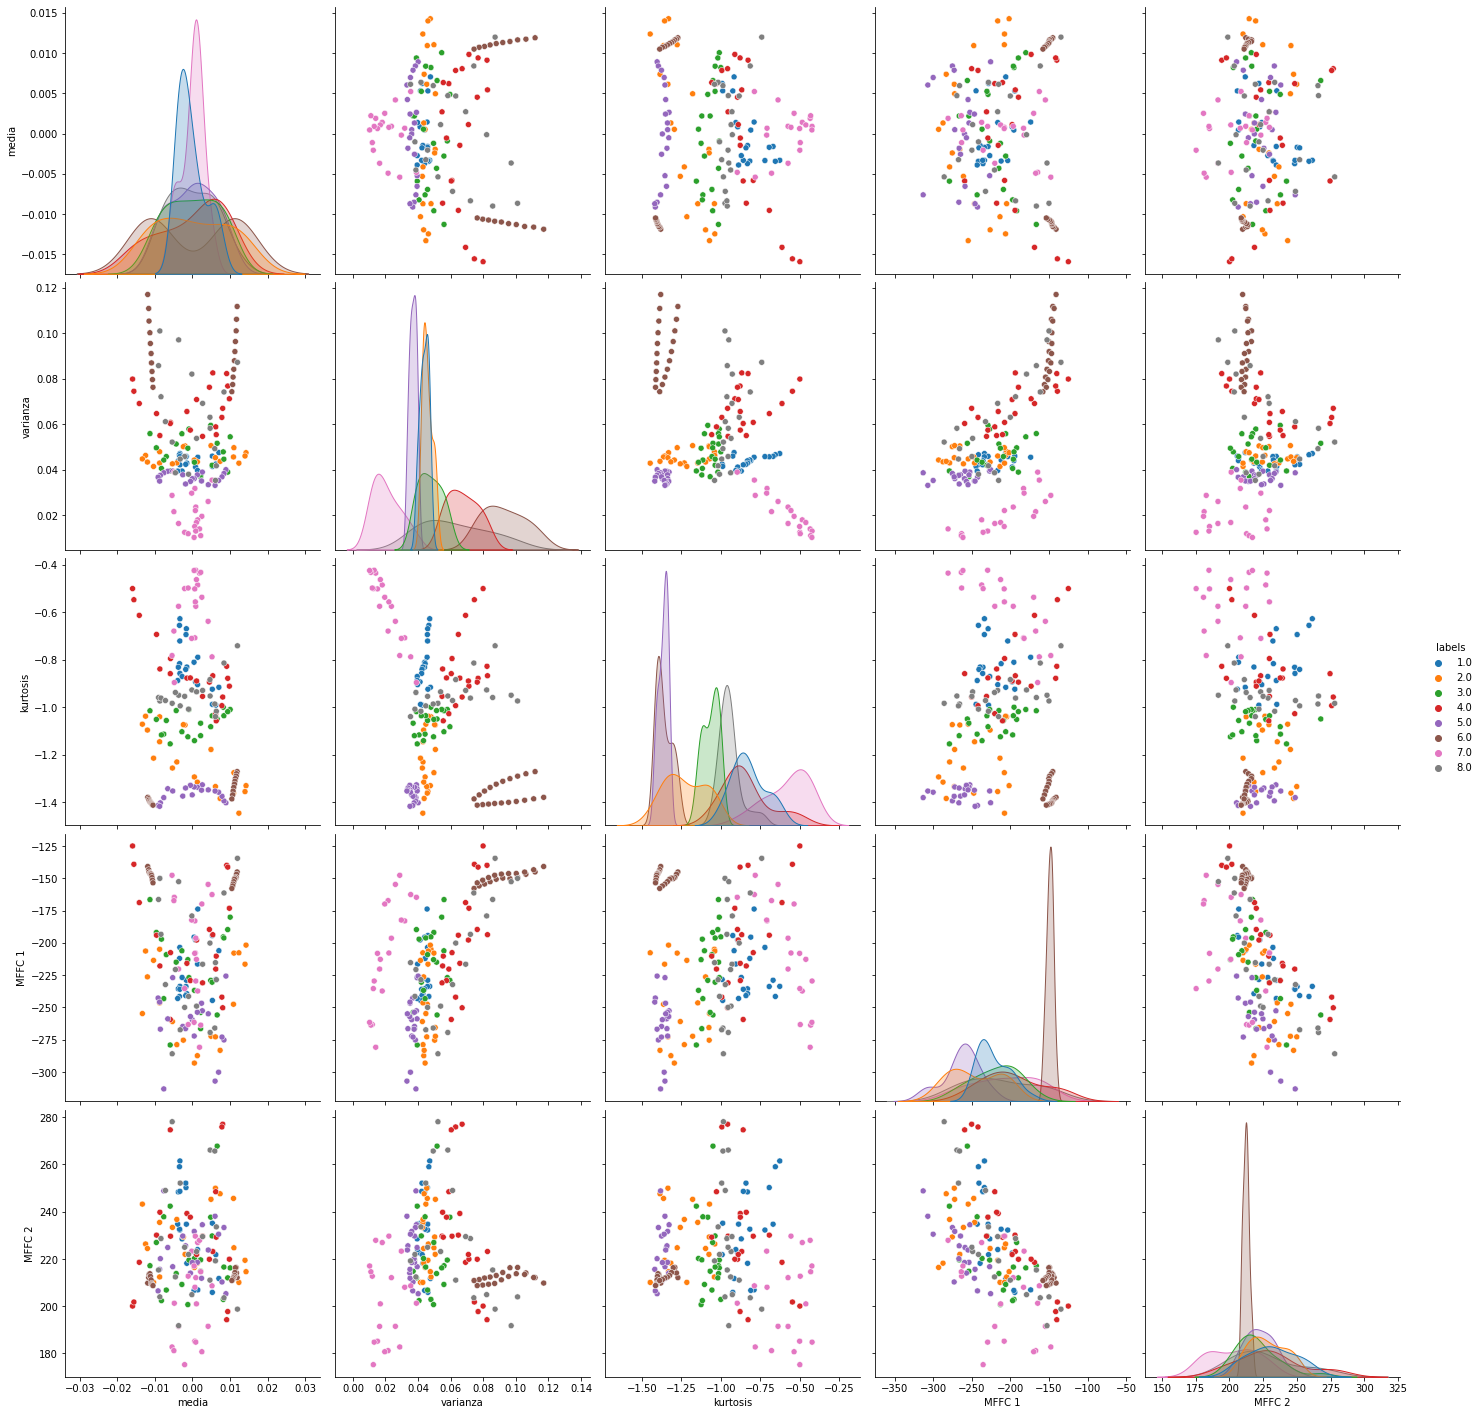

In [49]:
sns.pairplot(dataframe, hue='labels', palette='tab10', height=4)

## Trabajo de Laboratorio

- El **caso de estudio** corresponde a una grabación de voz que contiene una conversación entre dos personas. El objetivo es encontrar las características que nos permitan identificar patrones de la persona A, o la persona B. Procedimiento:

  1. Cargue los primeros 10 segundos de la señal con el nombre ``voz.mp3``.

  2. Estandarice la señal de manera que tenga media cero y desviación estándar 1.

  3. Segmente (enventanar) la señal en ventanas de 50 milisegundos, sin traslape. **Considere** que los primeros 3 segundos corresponden a $label=1$ (niño) y el resto de la señal corresponde a $label=2$ (adulto).

  4. Para cada ventana de datos extraiga características estadísticas: media, varianza, asimetría (skewness), curtosis, valor máximo y valor mínimo.

  5. Grafique las características obtenidas utilizando pairplots y series de tiempo. Analice los resultados y establezca si estas características  nos permiten identificar cuándo habla cada persona. Argumente su respuesta.

  6. A continuación, calcule y grafique la transformada de Fourier de todos los datos (audio sin enventanar). Compare estos resultados con la transformada de tiempo corto de Fourier (STFT), es decir, aplicar la transformada de Fourier a cada una de las ventanas o segmentos obtenidos en el punto 2 del procedimiento (espectrograma). ¿Qué diferencia encuentra entre estas dos representaciones? ¿cuál nos permite establecer cambios en el espectro con respecto al tiempo? ¿Qué información puede extraer e interpretar del espectrograma de la señal?
  
  7. Ahora, la idea es calcular los MFCCs de la señal analizada a partir de características estadísticas. Usando las mismas ventanas y etiquetas calculadas en el ítem 4, calcule 13 MFCCs de las ventanas resultantes. Luego de esto, grafique los primeros 5 MFCCs calculados utilizando pairplots. Analice los resultados y determine si estas nuevas características nos permiten identificar cuándo habla cada persona. En comparación con las medidas estadísticas, ¿se puede observar una mejor o peor visualización entre las clases? Argumente sus respuestas.
  
  8. Finalmente, investigue cómo utilizar un detector de frecuencia fundamental (F0) implementado en la librería ``librosa``, específicamente el algoritmo ``librosa.yin`` ([documentación](https://librosa.org/doc/0.10.1/generated/librosa.yin.html#librosa.yin)), y aplíquelo a la señal completa de voz (primeros 10 segundos). Grafique el resultado obtenido con respecto al tiempo e interprete los resultados. ¿Qué tipo de información podemos extraer o interpretar de estos resultados? ¿Podría la F0 ser una característica relevante en este fenómeno? Argumente su respuesta.

 
